# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [26]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('data_clean.pkl')
data

,transcript
COMANDANTE,movie reviews comandantedirected by edoardo de...
COUP DE CHANCE,movie reviews a scene reminiscent of donizetti...
PAST LIVES,movie reviews nora and hae sung childhood frie...
STARDUST MEMORIES,pauline kael had a mixed response to woody all...
THE LONG GOODBYE,by pauline kael edmund wilson summed up raymon...
THE ZONE OF INTEREST,movie reviews jonathan glazers the zone of int...
UNDER THE SKIN,movie reviews by mauro gervasini jonathan glaz...


In [6]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,polarity,subjectivity
COMANDANTE,movie reviews comandantedirected by edoardo de...,0.074341,0.404809
COUP DE CHANCE,movie reviews a scene reminiscent of donizetti...,0.088230,0.513801
PAST LIVES,movie reviews nora and hae sung childhood frie...,0.213291,0.524012
STARDUST MEMORIES,pauline kael had a mixed response to woody all...,0.011086,0.486585
THE LONG GOODBYE,by pauline kael edmund wilson summed up raymon...,0.068386,0.492902
THE ZONE OF INTEREST,movie reviews jonathan glazers the zone of int...,0.045417,0.432067
UNDER THE SKIN,movie reviews by mauro gervasini jonathan glaz...,0.048385,0.521667


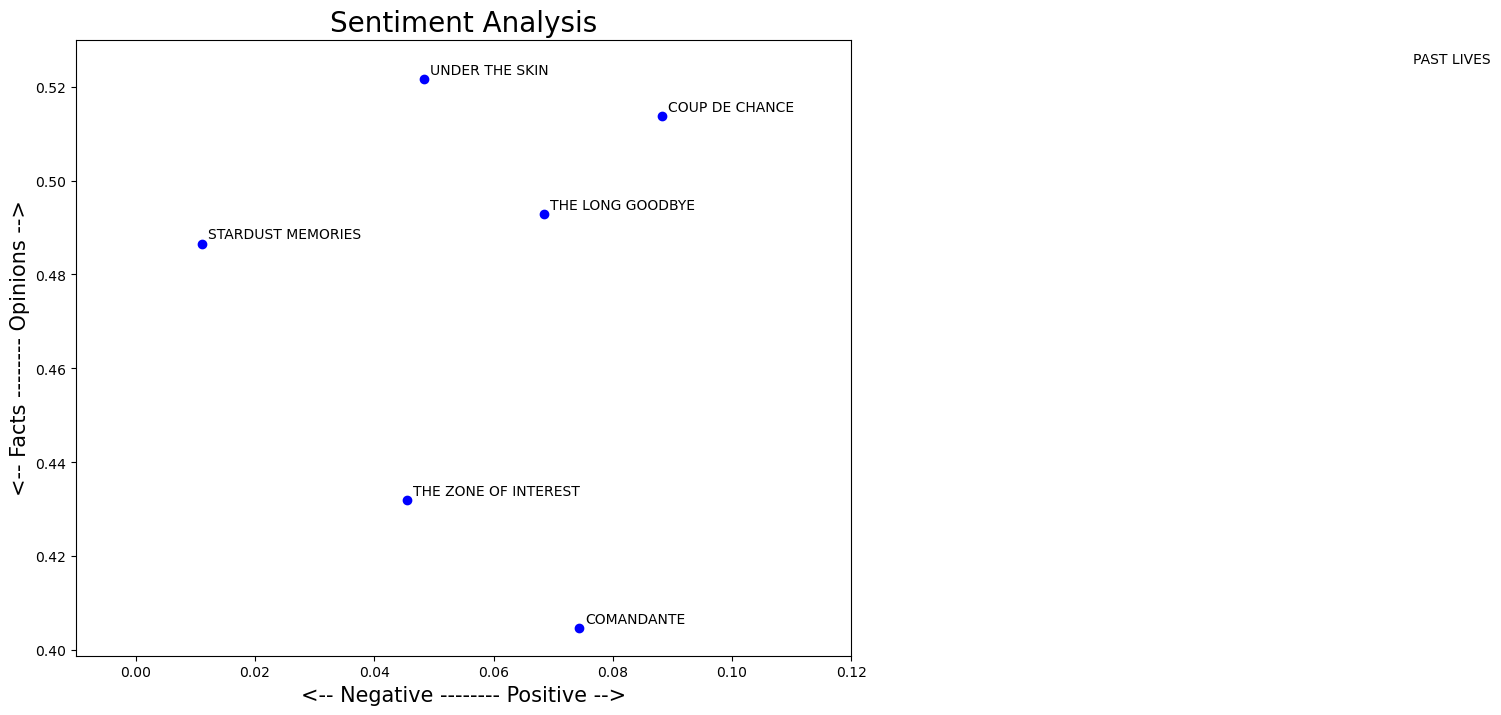

In [15]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, movie in enumerate(data.index):
    x = data.polarity.loc[movie]
    y = data.subjectivity.loc[movie]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, movie, fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [16]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [17]:
# Let's take a look at our data again
data

,transcript,polarity,subjectivity
COMANDANTE,movie reviews comandantedirected by edoardo de...,0.074341,0.404809
COUP DE CHANCE,movie reviews a scene reminiscent of donizetti...,0.088230,0.513801
PAST LIVES,movie reviews nora and hae sung childhood frie...,0.213291,0.524012
STARDUST MEMORIES,pauline kael had a mixed response to woody all...,0.011086,0.486585
THE LONG GOODBYE,by pauline kael edmund wilson summed up raymon...,0.068386,0.492902
THE ZONE OF INTEREST,movie reviews jonathan glazers the zone of int...,0.045417,0.432067
UNDER THE SKIN,movie reviews by mauro gervasini jonathan glaz...,0.048385,0.521667


In [18]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['movie reviews comandantedirected by edoardo de angelis plot at the onset of world war ii salvatore todaro captains the submarine cappellini of the royal italian navy in october  while navigating the atlantic in the dead of night he is attacked by a belgian merchant ship in the brief but violent battle todaro sinks the merchant ship with cannon fire it is at this juncture that following the law of the sea and in defiance of his comma',
  'nds orders he decides to save the belgian shipwreck survivors doomed to drown in the midst of the ocean in the introduction to the novel written with director edoardo de angelis based on their screenplay for comandante sandro veronesi shares that the inspiration for the films script dates back to the summer of  a period marked by a resurgence of xenophobia fueled by the increasing number of migrant landings fleeing detention camps i',
  'n libya in search of refuge on the siciliancalabrian coasts it was then that through an article in avvenire featu

In [19]:
# The list has 10 elements, one for each transcript
len(list_pieces)

7

In [20]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [21]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[-0.18333333333333335,
  0.05,
  0.020833333333333336,
  0.08999999999999997,
  0.0,
  0.20833333333333334,
  0.18333333333333332,
  -1.0,
  0.30999999999999994,
  0.11704545454545455],
 [0.06324561403508773,
  0.02666666666666666,
  0.12681096681096682,
  0.17708333333333334,
  -0.04749999999999999,
  0.08823529411764706,
  -0.03148148148148148,
  0.027142857142857142,
  0.2538720538720539,
  0.18149350649350648],
 [0.22727272727272724,
  0.7916666666666666,
  -0.06666666666666667,
  0.3666666666666667,
  0.1,
  0.42000000000000004,
  0.25,
  0.09642857142857143,
  -0.011111111111111118,
  0.045],
 [-0.15157142857142858,
  0.0509090909090909,
  -0.011574074074074077,
  -0.040542328042328026,
  -0.03235367063492062,
  0.08882936507936506,
  0.0381142506142506,
  -3.2467532467529506e-05,
  0.09619047619047623,
  0.06703169258724814],
 [0.08993995252059768,
  -0.008080623080623081,
  0.1410344705799251,
  0.18076923076923077,
  0.11117283950617284,
  0.06377410468319558,
  0.07561274509

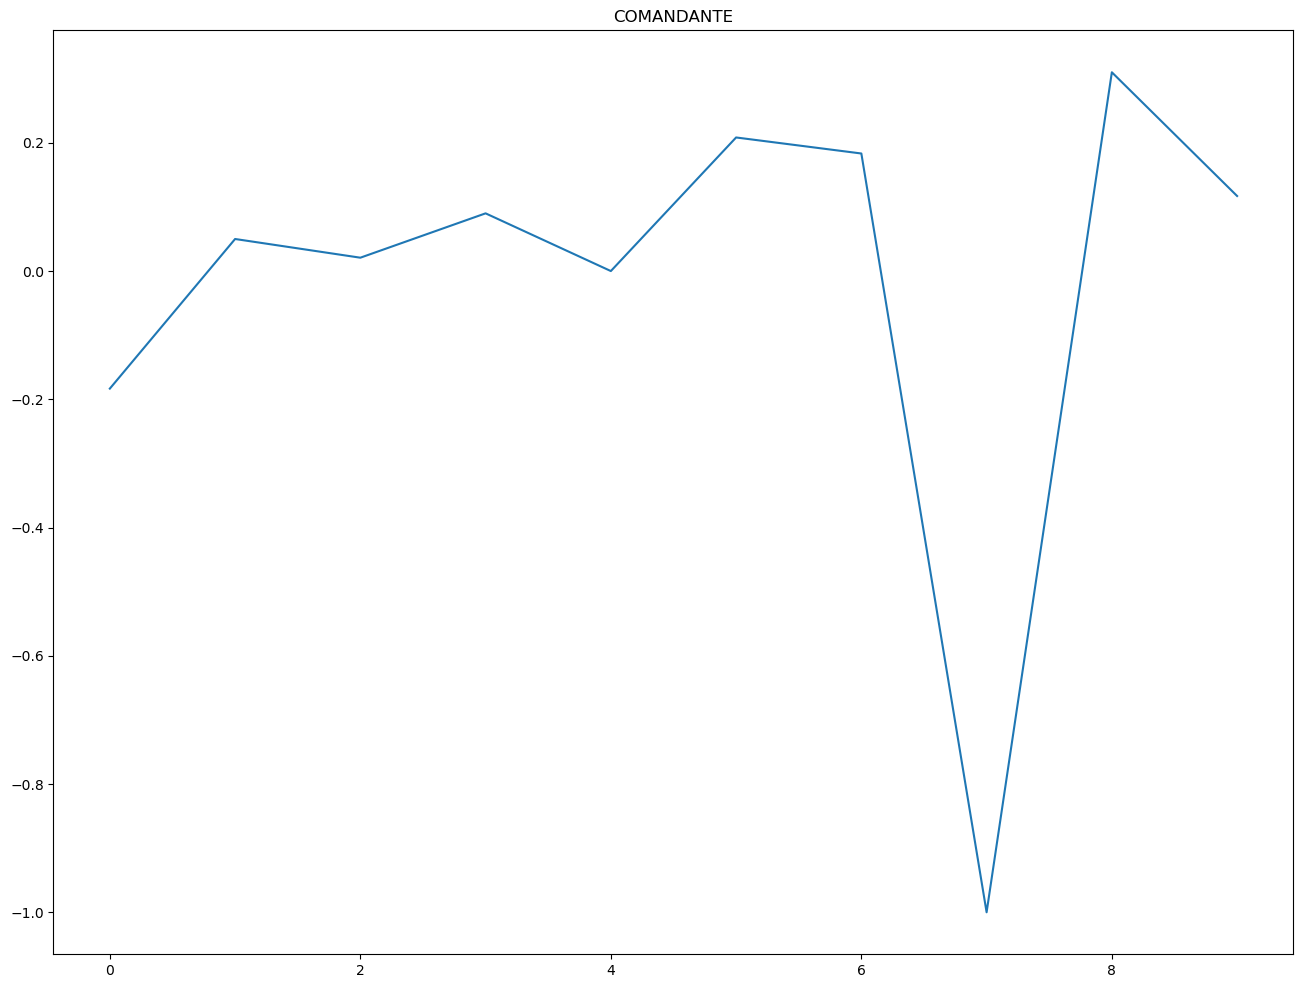

In [25]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data.index[0])
plt.show()

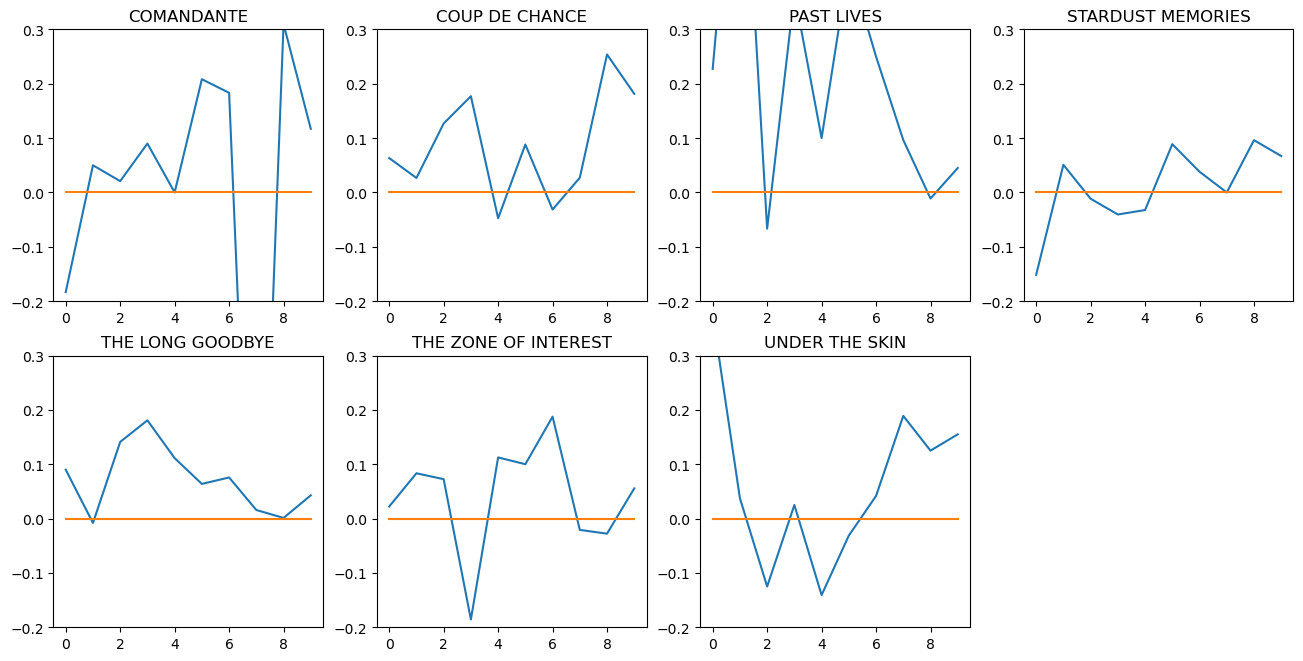

In [24]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(comedian)
    plt.ylim(bottom=-.2, top=.3)
    
plt.show()

Ali Wong stays generally positive throughout her routine. Similar comedians are Louis C.K. and Mike Birbiglia.

On the other hand, you have some pretty different patterns here like Bo Burnham who gets happier as time passes and Dave Chappelle who has some pretty down moments in his routine.

## Additional Exercises

1. Modify the number of sections the comedy routine is split into and see how the charts over time change.